In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
file = 'HK External Merchandise Trade Statistics - Total Exports to Ten Main Destinations_foruse.csv'
o_df = pd.read_csv(file)

In [84]:
df = o_df.copy()
df

,Year,Month,Korea,Korea_change,All destinations,All destinations_change
0,1972,NaN,179,N.A.,19400,13
1,1973,NaN,383,113.9,25999,34
2,1974,NaN,373,-2.7,30036,15.5
3,1975,NaN,328,-11.9,29832,-0.7
4,1976,NaN,476,44.9,41557,39.3
...,...,...,...,...,...,...
690,2025,Feb,4885,-9.3,327909,15.4
691,2025,Mar,5200,-22.8,455534,18.5
692,2025,Apr,4843,-26.7,434464,14.7
693,2025,May,4672,-25.6,434081,15.5


1. Year, Month, Korea 컬럼만 남기기
2. Month가 결측치인 행 제거
3. 결측치, 이상치 확인 및 처리
4. Year, Month 통합. datetime으로 변환

### 1

In [85]:
df = df[['Year', 'Month', 'Korea']]
df

,Year,Month,Korea
0,1972,NaN,179
1,1973,NaN,383
2,1974,NaN,373
3,1975,NaN,328
4,1976,NaN,476
...,...,...,...
690,2025,Feb,4885
691,2025,Mar,5200
692,2025,Apr,4843
693,2025,May,4672


### 2

In [86]:
df = df.drop(df.loc[df['Month'].isnull()].index, axis=0)

### 3

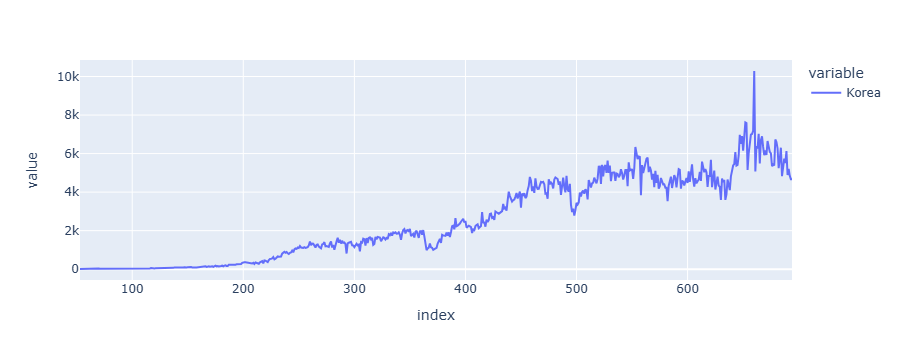

In [87]:
px.line(df['Korea'])

In [88]:
df.isnull().sum()

Year     0
Month    0
Korea    0
dtype: int64

In [89]:
df['Korea'].describe()

count      642.000000
mean      2524.034268
std       2116.431343
min         10.000000
25%        356.250000
50%       1909.000000
75%       4503.750000
max      10286.000000
Name: Korea, dtype: float64

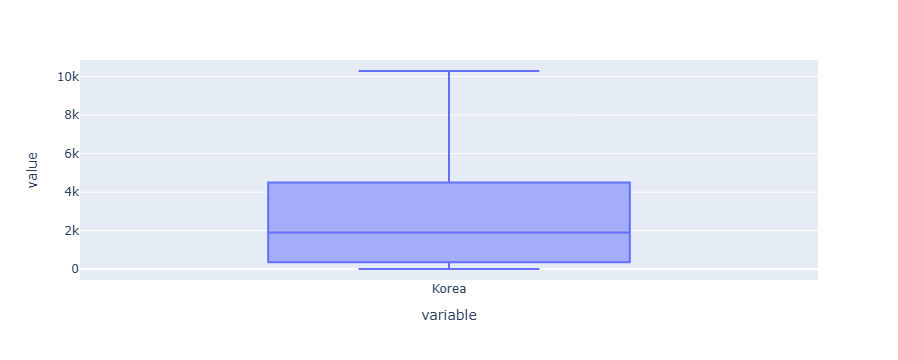

In [90]:
px.box(df['Korea'])

### 4

In [91]:
df.head(12)

,Year,Month,Korea
53,1972,Jan,10
54,1972,Feb,13
55,1972,Mar,11
56,1972,Apr,13
57,1972,May,13
58,1972,Jun,14
59,1972,Jul,12
60,1972,Aug,14
61,1972,Sep,19
62,1972,Oct,18


In [92]:
zip(range(1, 13), list(df['Month'][0:12]))

In [93]:
keys = df['Month'][0:12]
vals = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

month_dict = dict(zip(keys, vals))
month_dict

{'Jan': '01',
 'Feb': '02',
 'Mar': '03',
 'Apr': '04',
 'May': '05',
 'Jun': '06',
 'Jul': '07',
 'Aug': '08',
 'Sep': '09',
 'Oct': '10',
 'Nov': '11',
 'Dec': '12'}

In [94]:
df['Year1'] = df['Year'].astype(str) +[month_dict.get(key) for key in df['Month']]

In [95]:
df

,Year,Month,Korea,Year1
53,1972,Jan,10,197201
54,1972,Feb,13,197202
55,1972,Mar,11,197203
56,1972,Apr,13,197204
57,1972,May,13,197205
...,...,...,...,...
690,2025,Feb,4885,202502
691,2025,Mar,5200,202503
692,2025,Apr,4843,202504
693,2025,May,4672,202505


In [97]:
df['Year'] = pd.to_datetime(df['Year1'], format='%Y%m')
df.drop(columns=['Year1'], inplace=True)

In [107]:
df = df.reset_index(drop=True)

In [114]:
#df = df.drop(columns=['Month'])
df.rename(columns={'Korea': 'HK_export_to_Korea'}, inplace=True)
df

,Year,HK_export_to_Korea
0,1972-01-01,10
1,1972-02-01,13
2,1972-03-01,11
3,1972-04-01,13
4,1972-05-01,13
...,...,...
637,2025-02-01,4885
638,2025-03-01,5200
639,2025-04-01,4843
640,2025-05-01,4672


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                642 non-null    datetime64[ns]
 1   HK_export_to_Korea  642 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 10.2 KB


### Save

In [116]:
df.to_csv('HK_exports_to_korea_preprocessed.csv')

In [ ]:
# 로그 취해야 할 듯ㅈ